In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


## Prepare Dataset

In [112]:
# train_dataset_path = './dataset/dataset-raw-asli/train_preprocess.tsv'
# valid_dataset_path = './dataset/dataset-raw-asli/valid_preprocess.tsv'

train_dataset_path = 'Dataset/Training/Clean_train_data_nostem.csv'
# valid_dataset_path = './dataset-emosi/valid_preprocess.csv'

In [113]:
# train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
# valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)

# train_df.columns = ['text', 'label']
# valid_df.columns = ['text', 'label']

train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
# valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[0,1], skiprows=1)

train_df.columns = ['tweet', 'label']
# valid_df.columns = ['label', 'tweet']

In [114]:
train_df.head(10)

,tweet,label
0,"['pagi', 'emosi']",Anger
1,"['stabilitas', 'negara', 'memange', 'tahun', '...",Anger
2,"['emosi', 'liat']",Anger
3,"['aib', 'bodoh', 'aib', 'muncul', 'tindakan', ...",Anger
4,"['menyebalkan', 'bodoh']",Anger
5,"['asli', 'malu', 'maluin', 'indo', 'tolol', 'r...",Anger
6,"['drama', 'abg', 'tolol']",Anger
7,"['emosi', 'katla', 'kemarin', 'keterangannya',...",Anger
8,"['bangsat', 'tribute', 'no', 'bencana', 'no', ...",Anger
9,"['pergi', 'teriak', 'nangis', 'sekencang', 'ke...",Anger


In [115]:
train_df['label']

0       Anger
1       Anger
2       Anger
3       Anger
4       Anger
        ...  
7075      Sad
7076      Sad
7077      Sad
7078      Sad
7079      Sad
Name: label, Length: 7080, dtype: object

In [116]:
def get_label_idx(label):
    if label == 'Anger':
        return 0
    if label == 'Joy':
        return 1
    if label == 'Fear':
        return 2
    if label == "Love":
        return 3
    if label == "Sad":
        return 4
    if label == "Neutral":
        return 5

train_df['label'] = train_df['label'].apply(get_label_idx)
# valid_df['label'] = valid_df['label'].apply(get_label_idx)


In [117]:
unique_labels = train_df['label'].unique()
print(unique_labels)


[0 2 1 3 5 4]


In [118]:
train_df

,tweet,label
0,"['pagi', 'emosi']",0
1,"['stabilitas', 'negara', 'memange', 'tahun', '...",0
2,"['emosi', 'liat']",0
3,"['aib', 'bodoh', 'aib', 'muncul', 'tindakan', ...",0
4,"['menyebalkan', 'bodoh']",0
...,...,...
7075,"['pagi', 'seisi', 'semesta', 'sujud', 'zat', '...",4
7076,"['engkau', 'pergi', 'engkau', 'meninggalkan', ...",4
7077,"['kalah', 'tersakiti']",4
7078,"['apakabar', 'ku', 'fikiranku', 'menentu']",4


In [119]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["preprocessed"] = train_df["tweet"].apply(join_text_list)
# valid_df["preprocessed"] = valid_df["tweet_tokens_no_stemming"].apply(join_text_list)

train_df["preprocessed"].head()

0                                           pagi emosi
1    stabilitas negara memange tahun negara aman sb...
2                                           emosi liat
3    aib bodoh aib muncul tindakan kekejian sembuny...
4                                    menyebalkan bodoh
Name: preprocessed, dtype: object

## Generate Padded Sequence

In [120]:
# Parameters

vocab_size = 20000 #ukuran kosakata yang akan digunakan
max_length = 100 #panjang maksimal dari sebuah kalimat
embedding_dim = 8 #dimensi vektor embedding yang akan digunakan
trunc_type='post' #jika panjang kalimat melebihi max_length, potong bagian belakang kalimat
oov_tok = "<OOV>" #OOV (Out Of Vocabulary) token, jika suatu kata tidak ditemukan dalam kosakata

In [121]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan dan data validasi
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate word index dictionary untuk kalimat-kalimat pelatihan
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert kalimat-kalimat pelatihan menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert kalimat-kalimat validasi menjadi urutan kata
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)


{'<OOV>': 1, 'suka': 2, 'sedih': 3, 'semangat': 4, 'takut': 5, 'pagi': 6, 'marah': 7, 'bodoh': 8, 'bikin': 9, 'bahagia': 10, 'tuh': 11, 'kabar': 12, 'si': 13, 'malu': 14, 'anak': 15, 'sayang': 16, 'pakai': 17, 'kasih': 18, 'sepi': 19, 'cinta': 20, 'pas': 21, 'semoga': 22, 'wkwk': 23, 'emosi': 24, 'kak': 25, 'kaget': 26, 'yaa': 27, 'teman': 28, 'benci': 29, 'kecewa': 30, 'liat': 31, 'kadang': 32, 'biar': 33, 'ku': 34, 'tolol': 35, 'senang': 36, 'gini': 37, 'baca': 38, 'deh': 39, 'bilang': 40, 'kaya': 41, 'makan': 42, 'lupa': 43, 'iya': 44, 'kek': 45, 'salah': 46, 'nangis': 47, 'ngeri': 48, 'gimana': 49, 'sehat': 50, 'hati': 51, 'nonton': 52, 'sakit': 53, 'allah': 54, 'rumah': 55, 'bangun': 56, 'bangsat': 57, 'tidur': 58, 'waktu': 59, 'kemarin': 60, 'hidup': 61, 'kesal': 62, 'diam': 63, 'happy': 64, 'foto': 65, 'selamat': 66, 'denise': 67, 'beli': 68, 'eh': 69, 'cewek': 70, 'terima': 71, 'lagu': 72, 'bicara': 73, 'bagus': 74, 'alhamdulillah': 75, 'cepat': 76, 'tahun': 77, 'cowok': 78, 'p

In [122]:
# ## Tokenization
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# # Generate word index dictionary for the training sentences
# tokenizer.fit_on_texts(train_df['preprocessed'])
# word_index = tokenizer.word_index
# print(word_index)

# # Convert the training sentences into word sequences
# train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
# train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# # Convert the validation sentences into word sequences
# valid_sequences = tokenizer.texts_to_sequences(valid_df['tweet'])
# valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

In [123]:
# Split Dataset


In [124]:
# import pickle

# # Simpan tokenizer ke dalam file
# with open('tokenizer-3classes-no-stemming.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [125]:
print(train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  969 2248]


## Word Embedding

In [126]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4)

In [127]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [128]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1000])
print(word)

('bonus', array([ 0.01522537, -0.12986568,  0.29234239,  0.07117182,  0.22375371,
       -0.12939869,  0.51142383, -0.11373733]))


## Build and Compile Model

In [138]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

c:\Users\TEMP\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 8)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,310 (907.46 KB)

 Trainable params: 72,310 (282.46 KB)

 Non-trainable params: 160,000 (625.00 KB)

In [130]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_7
Weights Shape (Tensor 0): (20000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.35313025 -1.0664744   1.570884   ... -1.5707873   3.4798641
  -0.27496842]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: lstm_3
Weights Shape (Tensor 0): (8, 512)
Weights (Tensor 0):
[[-0.05077189 -0.1065354   0.06843287 ... -0.00155803 -0.08866924
  -0.00391002]
 [ 0.00565083 -0.01419265  0.00540456 ... -0.08234927 -0.03176454
  -0.04463966]
 [ 0.00181741  0.06387676 -0.02817032 ... -0.07794886  0.07002699
  -0.07634822]
 ...
 [-0.00518633 -0.08722462 -0.01184508 ... -0.05680313  0.06992926
  -0.07183185]
 [ 0.00904304 -0.0405146   0.0250665  ...  0.08068173  0.0538341


## Train Model

In [139]:
num_epochs = 50

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/50
177/177 - 19s - 108ms/step - accuracy: 0.2733 - loss: 1.7474 - val_accuracy: 0.2775 - val_loss: 1.7309
Epoch 2/50
177/177 - 10s - 55ms/step - accuracy: 0.2830 - loss: 1.7107 - val_accuracy: 0.2747 - val_loss: 1.7051
Epoch 3/50
177/177 - 10s - 56ms/step - accuracy: 0.2841 - loss: 1.6895 - val_accuracy: 0.2888 - val_loss: 1.6770
Epoch 4/50
177/177 - 10s - 56ms/step - accuracy: 0.2855 - loss: 1.6745 - val_accuracy: 0.2818 - val_loss: 1.6572
Epoch 5/50
177/177 - 10s - 55ms/step - accuracy: 0.3067 - loss: 1.6517 - val_accuracy: 0.3206 - val_loss: 1.6185
Epoch 6/50
177/177 - 11s - 62ms/step - accuracy: 0.3069 - loss: 1.6374 - val_accuracy: 0.3305 - val_loss: 1.6035
Epoch 7/50
177/177 - 10s - 56ms/step - accuracy: 0.3227 - loss: 1.6091 - val_accuracy: 0.3171 - val_loss: 1.6211
Epoch 8/50
177/177 - 10s - 59ms/step - accuracy: 0.3227 - loss: 1.6001 - val_accuracy: 0.3312 - val_loss: 1.5814
Epoch 9/50
177/177 - 10s - 56ms/step - accuracy: 0.3293 - loss: 1.5855 - val_accuracy: 0.3355 -

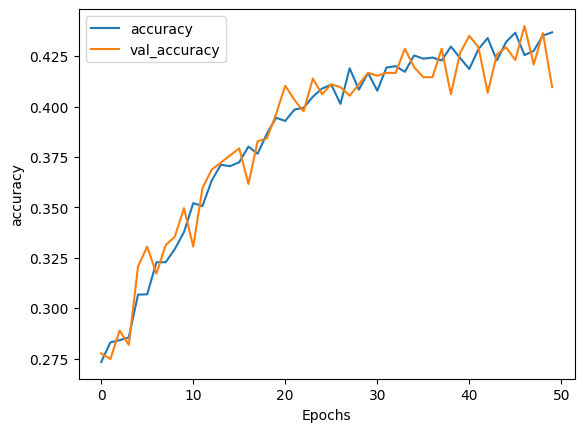

In [140]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

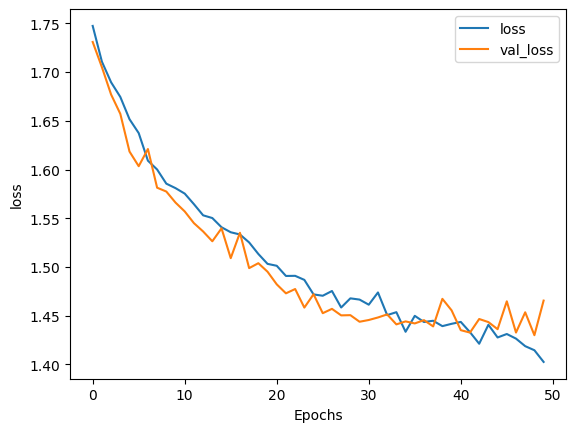

In [141]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [150]:
## test model with predict one example sentence
sample_text = ["sedih"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 0:
        return 'Anger'
    if predict == 1:
        return 'Joy'
    if predict == 2:
        return 'Fear'
    if predict == 3:
        return 'Love'
    if predict == 4:
        return 'Sad'
    if predict == 5:
        return 'Neutral'
    
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.02512451 0.03451926 0.0202735  0.02771037 0.68346536 0.208907  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Sad


In [151]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
(1416,)
(1416, 6)
              precision    recall  f1-score   support

           0       0.80      0.02      0.03       233
           1       0.41      0.21      0.28       253
           2       0.00      0.00      0.00       195
           3       0.50      0.81      0.62       153
           4       0.77      0.45      0.57       193
           5       0.34      0.80      0.48       389

    accuracy                           0.41      1416
   macro avg       0.47      0.38      0.33      1416
weighted avg       0.46      0.41      0.33      1416



c:\Users\TEMP\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TEMP\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TEMP\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [153]:
#save model
model.save('./model/model-LSTM-word2vec-3-classes-no-stemming.h5')

In [154]:
import numpy as np
import tensorflow as tf

# Inisialisasi bobot kernel dengan ukuran 5
kernel_size = 5
num_filters = 1
embedding_dim = 8

# Membuat bobot kernel dengan inisialisasi Glorot uniform
initializer = tf.keras.initializers.GlorotUniform()
kernel_weights = initializer(shape=(kernel_size, embedding_dim, num_filters))

# Dibulatkan ke angka terdekat
kernel_weights_rounded = np.round(kernel_weights, decimals=2)

print("Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):")
print(kernel_weights_rounded)
print("Shape bobot kernel:", kernel_weights.shape)


Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):
[[[-0.19]
  [ 0.05]
  [-0.23]
  [ 0.21]
  [-0.35]
  [-0.03]
  [ 0.22]
  [-0.09]]

 [[-0.04]
  [ 0.3 ]
  [ 0.07]
  [-0.23]
  [ 0.15]
  [ 0.09]
  [ 0.01]
  [ 0.02]]

 [[-0.03]
  [ 0.22]
  [ 0.36]
  [ 0.31]
  [-0.15]
  [-0.08]
  [-0.07]
  [-0.11]]

 [[ 0.35]
  [ 0.06]
  [-0.14]
  [ 0.14]
  [-0.02]
  [ 0.33]
  [-0.18]
  [ 0.15]]

 [[-0.02]
  [ 0.16]
  [-0.14]
  [ 0.28]
  [-0.29]
  [ 0.25]
  [ 0.  ]
  [ 0.23]]]
Shape bobot kernel: (5, 8, 1)
